Had trouble getting zip function to work.... learned it can be called as such (much easier to run!!!)

In [ ]:
a = [[1,2,3],[4,5,6]]

zipped = list(zip(*a))
x,y, z = zipped

Reading in Warriors Rockets October $17^{th}$ 2017

In [1]:
import json
import numpy as np

In [2]:
reader = open('warriors_game1.json')
game1 = json.load(reader)

In [20]:
# swaggyP = game1['2017/10/17/HOUGSW/']['homeplayers']['NickYoung']
swaggyP = game1['2017/10/17/HOUGSW/']['homeplayers']['KevinDurant']


In [21]:
dx = np.subtract(swaggyP['x'][2:], swaggyP['x'][:-2])
dy = np.subtract(swaggyP['y'][2:], swaggyP['y'][:-2])


dist = np.sqrt(dx**2 + dy**2)

In [22]:
dist[0:20]

array([0.69115845, 0.26305893, 0.117047  , 0.1603122 , 0.1603122 ,
       0.01      , 0.17029386, 0.17029386, 0.03162278, 0.03162278,
       0.17029386, 0.        , 0.01414214, 0.01414214, 0.01      ,
       0.01      , 0.        , 0.        , 0.        , 0.18      ])

work on running average of position to 'smooth' out the points

In [23]:
x = swaggyP['x']
y = swaggyP['y']
time = np.linspace(0,len(x),len(x))*0.04

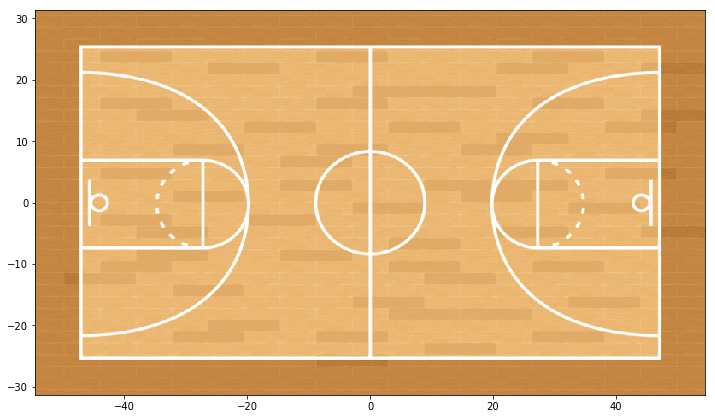

In [6]:
from imageio import imread
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,10))
img = imread("court.png")
plt.imshow(img,zorder=0, extent = [-54.5,54.5,-31.3,31.3])

In [24]:
def moving_average(a, n) : #https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [25]:
new_x = moving_average(x,n=5)
new_y = moving_average(y,n=5)
new_time = time[2:-2]

In [26]:
dx = new_x[2:]-new_x[:-2]
dy = new_y[2:]-new_y[:-2]
dist = np.sqrt(np.square(dx)+np.square(dy)) # change in distance is 0.08 seconds apart
velo = dist/0.08
time_velo = new_time[1:-1]

dx, dy, dist, velo, new_x[0],new_x[2]
dxx = np.array(x[2:])-np.array(x[:-2])
dyy = np.array(y[2:])-np.array(y[:-2])
distt = np.sqrt(np.square(dxx)+np.square(dyy))
veloo = distt/0.08
vt = np.linspace(0,len(veloo),len(veloo))*0.04

Plot of Velo w/ outlier data

<IPython.core.display.Javascript object>


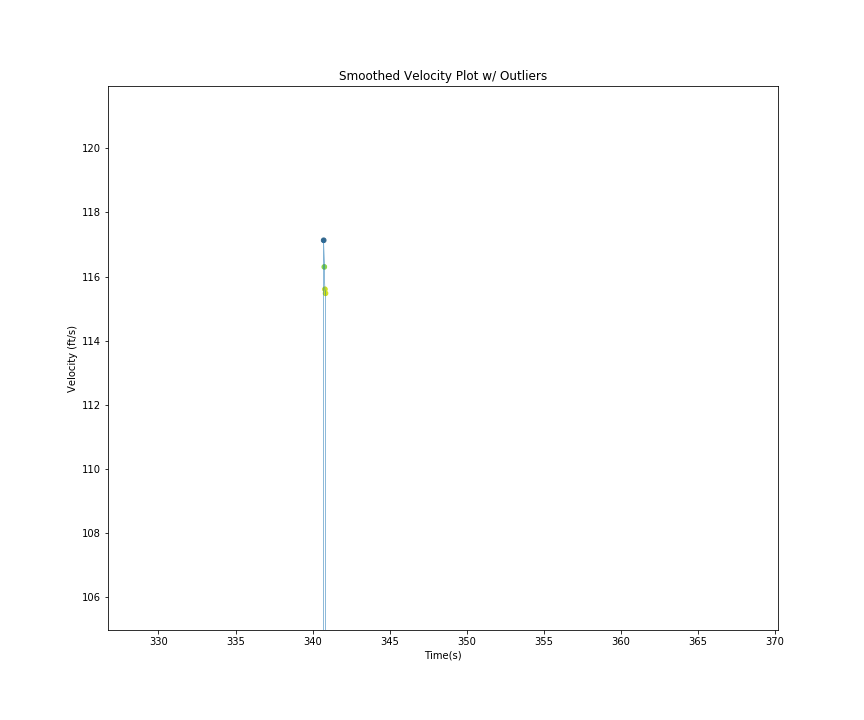

In [27]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
colors = np.random.random(len(time_velo[velo>50]))
%matplotlib notebook
plt.figure(figsize = (12,10))
plt.scatter(time_velo[velo>50],velo[velo>50],c=colors,s=(2/50*velo[velo>50])**2)
plt.plot(time_velo,velo,linewidth=0.5)
plt.xlabel('Time(s)')
plt.ylabel('Velocity (ft/s)')
plt.title('Smoothed Velocity Plot w/ Outliers')
plt.savefig('smoothed_velo.png')

In [29]:
high_velos = velo[velo>30]
findee = list(velo)
for i in high_velos:
    print(findee.index(i))
    findee[findee.index(i)] = 0

1674
1675
1676
1677
1678
1679
3954
3955
3956
3957
3958
3959
5034
5035
5036
5037
5038
5039
6474
6475
6476
6477
6478
6479
7554
7555
7556
7557
7558
7559
8514
8515
8516
8517
8518
8519
8874
8875
8876
8877
8878
8879
9834
9835
9836
9837
9838
9839
13674
13675
13676
13677
13678
13679
14394
14395
14396
14397
14398
14399
15354
15355
15356
15357
15358
15359
17154
17155
17156
17157
17158
17159
18594
18595
18596
18597
18598
18599
18954
18955
18956
18957
18958
18959
20035
20036
20037
20038
20039
20275
20276
20277
20278
20754
20755
20756
20757
20758
20759
20874
20875
20876
20877
20878
20879
21714
21715
21716
21717
21718
21719
23394
23395
23396
23397
23398
23399
24234
24235
24236
24237
24238
24239
25194
25195
25196
25197
25198
25199
25794
25795
25796
25797
25798
25799
26635
26636
26637
26638
29445
29446
29447
29448
29449
29450
29513
29514
29515
29516
29517
29519
29874
29875
29876
29877
29878
29879
31434
31435
31436
31437
31438
31439
33954
33955
33956
33957
33958
33959
34675
34676
34677
34678
35274
3527

In [ ]:
plt.figure()
# plt.plot(vt,veloo,'b')
plt.scatter(time_velo,findee,c='r', s=(1/20*np.array(findee))**9)
plt.plot(time_velo,findee,'b',linewidth=0.3)

In [32]:
# new_x[233:245], new_y[233:245], dist[234:245], velo[234:239], 
x[1673:1685], y[1673:1685], new_x[1673:1685]

([-18.55,
  -18.69,
  -18.83,
  -18.98,
  -19.17,
  -19.5,
  -19.5,
  -37.74,
  -37.66,
  -37.64,
  -37.63,
  -37.6],
 [9.03, 9.17, 9.31, 9.46, 9.44, 9.5, 9.5, -9.19, -8.96, -8.91, -8.9, -8.8],
 array([-18.844, -19.034, -19.196, -22.978, -26.714, -30.408, -34.034,
        -37.654, -37.626, -37.608, -37.6  , -37.588]))

In [ ]:
len(new_x)

In [ ]:
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.figure()
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)

In [38]:
time_velo[8514]
x[8514]

-10.82

In [39]:
y[8514]

-17.66